In [1]:
from agents import Consumer, Producer, Influencer
from content_market import ContentMarket
import numpy as np

In [2]:
num_producers = 5
num_influencers = 1
num_consumers = 5

topics = [[1, 10]]
topics = np.array(topics)

In [3]:
content_market = ContentMarket(topics, num_producers, num_consumers, num_influencers)

In [4]:
from util import exponential_decay, inverse_decay, tanh_decay

In [5]:
producer_colors = []
consumer_colors = []
influencer_colors = []

for i in range(num_producers):
    #func = lambda x: exponential_decay(x, 1)
    # func = lambda x: 1.0
    func = lambda x: inverse_decay(x, 1, 2)
    producer = Producer(i, content_market.sample_topic(), func)
    content_market.add_producer(producer)
    
    color = np.random.rand(3,)
    producer_colors.append(color)

for i in range(num_consumers):
    #func = lambda x: exponential_decay(x, 1)
    #func = lambda x : 1.0
    func = lambda x: inverse_decay(x, 1, 2)
    consumer = Consumer(i, content_market.sample_topic(), func, 1, .1, 1)
    content_market.add_consumer(consumer)

    color = np.random.rand(3,)
    consumer_colors.append(color)
    print(len(consumer.get_following_rate_vector()))

for i in range(num_influencers):
    #func = lambda x: exponential_decay(x, 1)
    #func = lambda x : 1.0
    influencer = Influencer(i, content_market.sample_topic(), 1, 1)
    content_market.add_influencer(influencer)

    color = np.random.rand(3,)
    influencer_colors.append(color)

7
7
7
7
7


In [6]:
import matplotlib.pyplot as plt

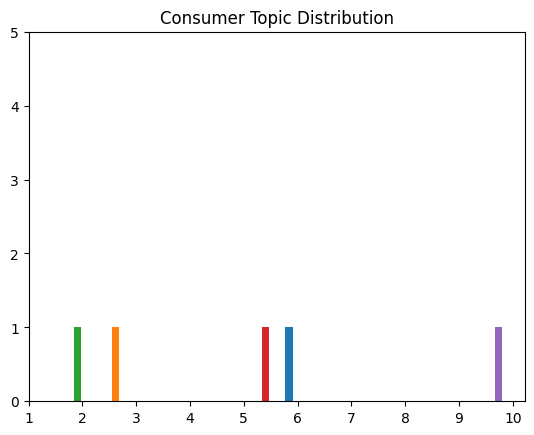

In [7]:
plt.figure()
plt.title("Consumer Topic Distribution")
plt.hist([c.main_interest for c in content_market.consumers])
plt.yticks(range(0, num_consumers + 1))
plt.xticks(range(1, 11))
plt.show()

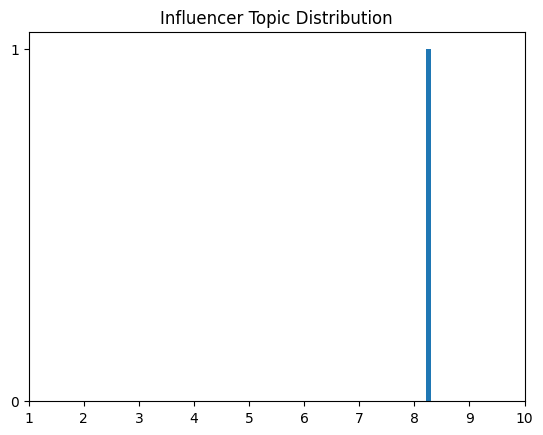

In [18]:
plt.figure()
plt.title("Influencer Topic Distribution")
plt.hist([i.main_interest for i in content_market.influencers])
plt.yticks(range(0, num_influencers + 1))
plt.xticks(range(1, 11))
plt.show()

In [8]:
consumer_stats, influencer_stats, producer_stats, total_stats, average_stats = content_market.optimize(1, 1, 100)

Iteration 0 / 100 done.
Iteration 1 / 100 done.
Consumer rate change: 0.0
Consumer utility change: 0.05154422178139267
Influencer rate change: 0.0
Influencer utility change: 0.0
Producer topic change: 0.8804239556987706
Producer utility change: 0.03790053601488022
Iteration 2 / 100 done.
Consumer rate change: 0.0
Consumer utility change: 0.13444768245066785
Influencer rate change: 0.0
Influencer utility change: 0.0
Producer topic change: 0.11563520561138434
Producer utility change: 0.08335096035903547
Iteration 3 / 100 done.
Consumer rate change: 0.0
Consumer utility change: 0.05187278889455482
Influencer rate change: 0.0
Influencer utility change: 0.0
Producer topic change: 0.39439939841653776
Producer utility change: 0.008555063819827069
Iteration 4 / 100 done.
Consumer rate change: 0.0
Consumer utility change: 0.03601520665394073
Influencer rate change: 0.0
Influencer utility change: 0.0
Producer topic change: 0.16369748889346064
Producer utility change: 0.0023839393690308075
Iterat

/Users/gabeguralnick/git/content-market-experiment/agents/influencer.py:74: RuntimeWarning: divide by zero encountered in scalar divide
  delay = np.exp(-influencer.delay_sensitivity * (1 / influencer.producer_following_rates[producer.index] + 1 / consumer.influencer_following_rates[influencer.index]))
/Users/gabeguralnick/git/content-market-experiment/agents/influencer.py:74: RuntimeWarning: divide by zero encountered in scalar divide
  delay = np.exp(-influencer.delay_sensitivity * (1 / influencer.producer_following_rates[producer.index] + 1 / consumer.influencer_following_rates[influencer.index]))
/Users/gabeguralnick/git/content-market-experiment/agents/influencer.py:74: RuntimeWarning: divide by zero encountered in scalar divide
  delay = np.exp(-influencer.delay_sensitivity * (1 / influencer.producer_following_rates[producer.index] + 1 / consumer.influencer_following_rates[influencer.index]))
/Users/gabeguralnick/git/content-market-experiment/agents/influencer.py:74: RuntimeWarni

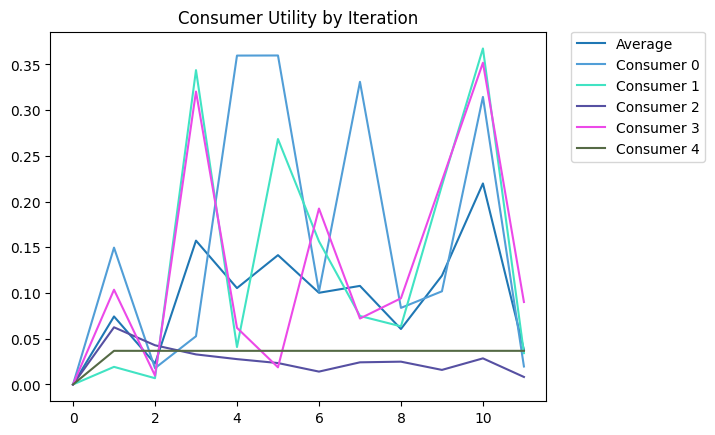

In [9]:
plt.figure()
plt.title("Consumer Utility by Iteration")
#plt.plot(total_stats['consumer_utilities'], label="Total")
plt.plot(average_stats['consumer_utilities'], label="Average")
for consumer in content_market.consumers:
    plt.plot(consumer_stats[consumer.index]['utilities'], label="Consumer {}".format(consumer.index), color=consumer_colors[consumer.index])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

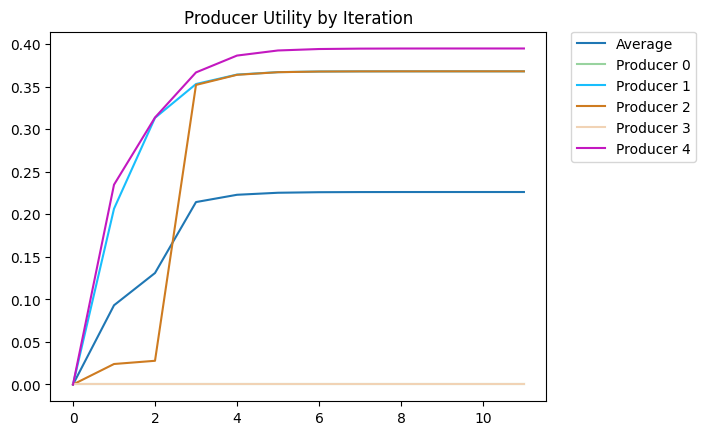

In [10]:
plt.figure()
plt.title("Producer Utility by Iteration")
#plt.plot(total_stats['producer_utilities'], label="Total")
plt.plot(average_stats['producer_utilities'], label="Average")
for producer in content_market.producers:
    plt.plot(producer_stats[producer.index]['utilities'], label='Producer {}'.format(producer.index), color=producer_colors[producer.index])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

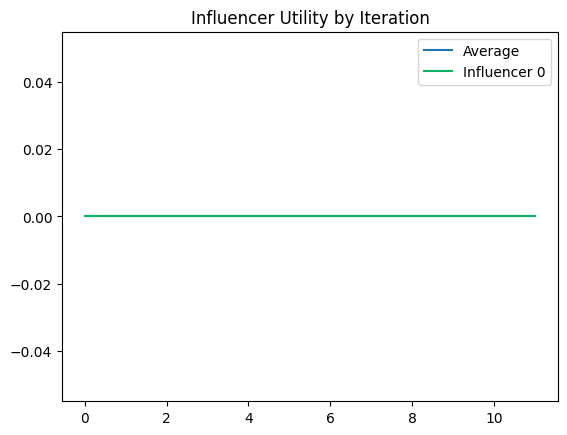

In [11]:
plt.figure()
plt.title("Influencer Utility by Iteration")
#plt.plot(total_stats['influencer_utilities'], label="Total")
plt.plot(average_stats['influencer_utilities'], label="Average")
for influencer in content_market.influencers:
    plt.plot(influencer_stats[influencer.index]['utilities'], label='Influencer {}'.format(influencer.index), color=influencer_colors[influencer.index])
plt.legend()
plt.show()

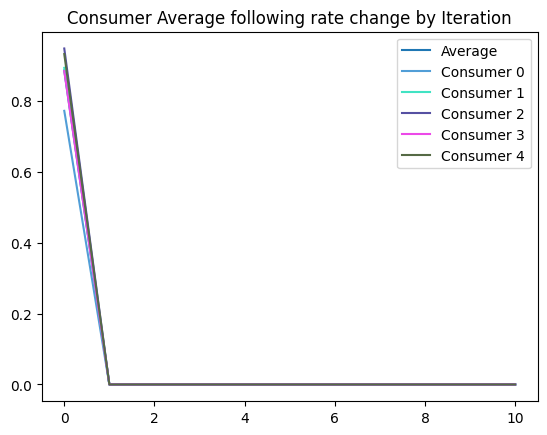

In [12]:
plt.figure()
plt.title("Consumer Average following rate change by Iteration")
plt.plot(average_stats['consumer_rate_change'], label='Average')
for consumer in content_market.consumers:
    plt.plot(consumer_stats[consumer.index]['rate_change'], label='Consumer {}'.format(consumer.index), color=consumer_colors[consumer.index])
plt.legend()
plt.show()

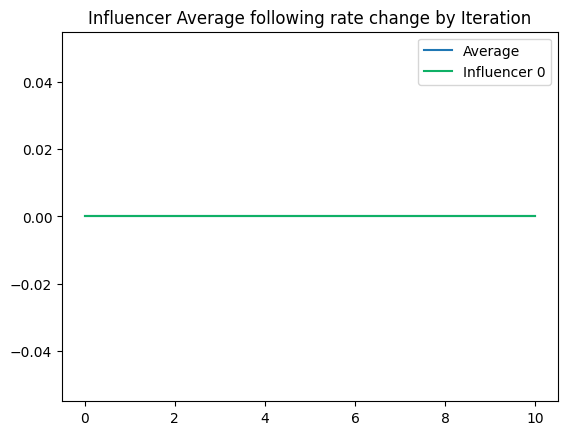

In [13]:
plt.figure()
plt.title("Influencer Average following rate change by Iteration")
plt.plot(average_stats['influencer_rate_change'], label='Average')
for influencer in content_market.influencers:
    plt.plot(influencer_stats[influencer.index]['rate_change'], label='Influencer {}'.format(influencer.index), color=influencer_colors[influencer.index])
plt.legend()
plt.show()

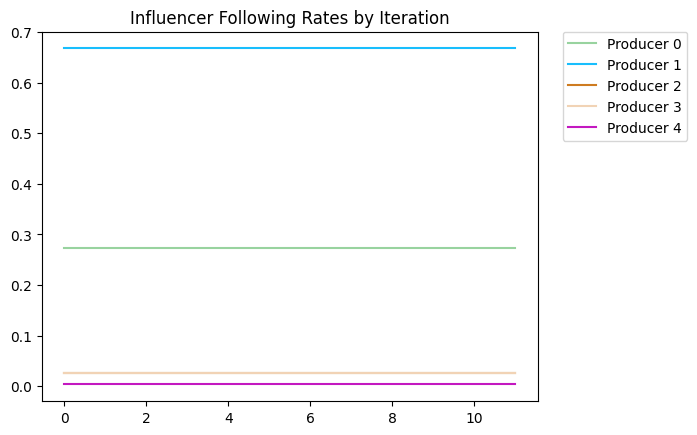

In [14]:
plt.figure()
plt.title("Influencer Following Rates by Iteration")
following_rates_by_iteration = [[vec[i] for vec in influencer_stats[0]['following_rates']] for i in range(len(influencer_stats[0]['following_rates'][0]))]
for i in range(len(following_rates_by_iteration)):
    plt.plot(following_rates_by_iteration[i], label='Producer {}'.format(i), color=producer_colors[i])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

[0.006703408504878455, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.05602722447342836, 2.790519343499296e-17, 2.790519343499296e-17, 2.790519343499296e-17, 2.790519343499296e-17, 2.790519343499296e-17, 2.790519343499296e-17, 2.790519343499296e-17, 2.790519343499296e-17, 2.790519343499296e-17, 2.790519343499296e-17, 2.790519343499296e-17]
[0.08748632143637755, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.11229578819415119, 2.505798342446887e-15, 2.505798342446887e-15, 2.505798342446887e-15, 2.505798342446887e-15, 2.505798342446887e-15, 2.505798342446887e-15, 2.505798342446887e-15, 2.505798342446887e-15, 2.505798342446887e-15, 2.505798342446887e-15, 2.505798342446887e-15]
[0.11611461216969651, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


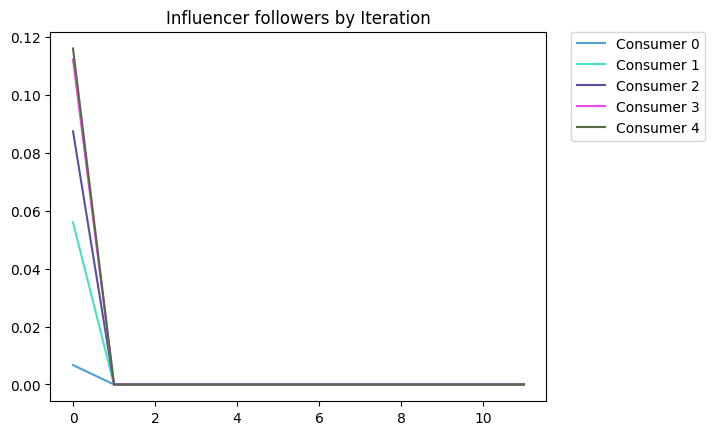

In [21]:
plt.figure()
plt.title("Influencer followers by Iteration")
for consumer in content_market.consumers:
    following_rate_by_iteration = [vec[num_producers + content_market.influencers[0].index] for vec in consumer_stats[consumer.index]['following_rates']]
    plt.plot(following_rate_by_iteration, label='Consumer {}'.format(consumer.index), color=consumer_colors[consumer.index])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [15]:
consumer_stats

{0: {'following_rates': [array([0.28835126, 0.31193588, 0.12025703, 0.13625862, 0.06634932,
          0.00670341, 0.04134742]),
   array([2.77555756e-16, 1.00000000e+00, 0.00000000e+00, 2.57871410e-16,
          1.42038680e-16, 0.00000000e+00, 1.08744375e-17]),
   array([2.77555756e-16, 1.00000000e+00, 0.00000000e+00, 2.57871410e-16,
          1.42038680e-16, 0.00000000e+00, 1.08744375e-17]),
   array([2.77555756e-16, 1.00000000e+00, 0.00000000e+00, 2.57871410e-16,
          1.42038680e-16, 0.00000000e+00, 1.08744375e-17]),
   array([2.77555756e-16, 1.00000000e+00, 0.00000000e+00, 2.57871410e-16,
          1.42038680e-16, 0.00000000e+00, 1.08744375e-17]),
   array([2.77555756e-16, 1.00000000e+00, 0.00000000e+00, 2.57871410e-16,
          1.42038680e-16, 0.00000000e+00, 1.08744375e-17]),
   array([2.77555756e-16, 1.00000000e+00, 0.00000000e+00, 2.57871410e-16,
          1.42038680e-16, 0.00000000e+00, 1.08744375e-17]),
   array([2.77555756e-16, 1.00000000e+00, 0.00000000e+00, 2.57871410

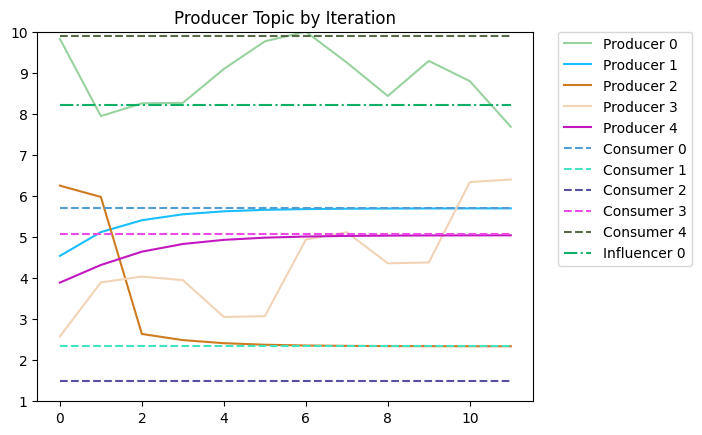

In [16]:
plt.figure()
plt.title("Producer Topic by Iteration")
for producer in content_market.producers:
    plt.plot(producer_stats[producer.index]['topics'], label='Producer {}'.format(producer.index), color=producer_colors[producer.index])
for consumer in content_market.consumers:
    plt.plot([consumer.main_interest] * len(producer_stats[producer.index]['topics']), label='Consumer {}'.format(consumer.index), linestyle='--', color=consumer_colors[consumer.index])
for influencer in content_market.influencers:
    plt.plot([influencer.main_interest] * len(producer_stats[producer.index]['topics']), label='Influencer {}'.format(influencer.index), linestyle='-.', color=influencer_colors[influencer.index])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim(topics[0][0], topics[0][1])
plt.show()

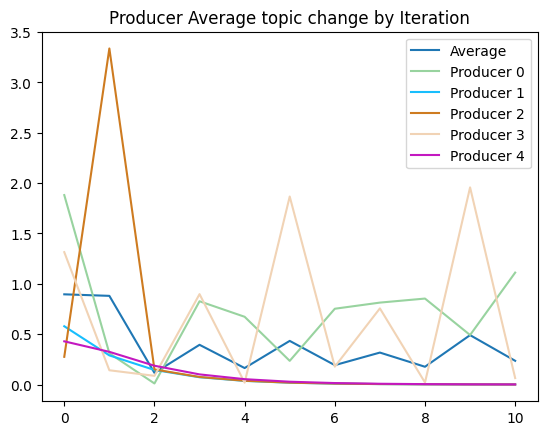

In [17]:
plt.figure()
plt.title("Producer Average topic change by Iteration")
plt.plot(average_stats['producer_topic_change'], label='Average')
for producer in content_market.producers:
    plt.plot(producer_stats[producer.index]['topic_change'], label='Producer {}'.format(producer.index), color=producer_colors[producer.index])
plt.legend()
#plt.ylim(topics[0][0], topics[0][1])
plt.show()